# **Epithelial subcluster**

In [ ]:
import sys
sys.path.append("../code")
from code.data_prep.io import *
from code.data_prep.processing import *
from code.plotting.plot_settings import *
from code.plotting.palette import *

In [1]:
import scanpy as sc
from scanpy.plotting._anndata import _prepare_dataframe
from pathlib import Path
import numpy as np
import pandas as pd
import scrublet as scr

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sc.settings.verbosity=3

In [3]:
main_dir = "/projects/robson-lab/research/endometriosis/"
sample_id = "Endometriosis-revision-3"
sub_dir = "Epithelial"

sc.settings.figdir = f"{main_dir}figures/{sample_id}"
matplotlib.rcParams["figure.facecolor"]="white"

---

---

In [6]:
full = sc.read(f"{main_dir}/data/h5ad/{sample_id}/{sub_dir}/{sample_id}-Epi-20220103.h5ad")

In [7]:
full

AnnData object with n_obs × n_vars = 19245 × 24231
    obs: 'sequencing_saturation', 'Patient_id', 'stage', 'scrublet_predicted_doublet', 'scrublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mitochondrial', 'log1p_total_counts_mitochondrial', 'pct_counts_mitochondrial', 'total_counts_hemoglobin', 'log1p_total_counts_hemoglobin', 'pct_counts_hemoglobin', 'library', '10x_chemistry', 'sample_name', 'sampleid', 'sample_type', 'leiden', 'leiden_R1', 'leiden_R2', 'leiden_R3', 'leiden_R4', 'leiden_R5', 'leiden_R6', 'leiden_R7', 'visible_doublet', 'cluster', 'cluster_R1', 'celltype', 'celltype_main'
    var: 'gene_ids', 'mitochondrial', 'hemoglobin', 'total_counts', 'n_cells_by_counts', 'ribosomal', 'cell_cycle', 'stress_response', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells'
    u

#### Batch Corrections & UMAP Computing

In [8]:
%load_ext rpy2.ipython

In [9]:
sc.pp.pca(full, svd_solver="arpack",use_highly_variable=True)

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:02)


In [42]:
pcs = full.obsm["X_pca"]
metadata = full.obs
covariates = ["Patient_id"]
thetas = np.array([1.5])

In [50]:
%%R -i pcs -i covariates -i thetas -i metadata -o pcs_harmony
library(harmony)
pcs_harmony <- HarmonyMatrix(
    pcs,
    metadata,
    vars_use=covariates,
    theta=thetas,
    do_pca=FALSE
)

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

In [52]:
harmonized = load_pcs(full, pcs_harmony)

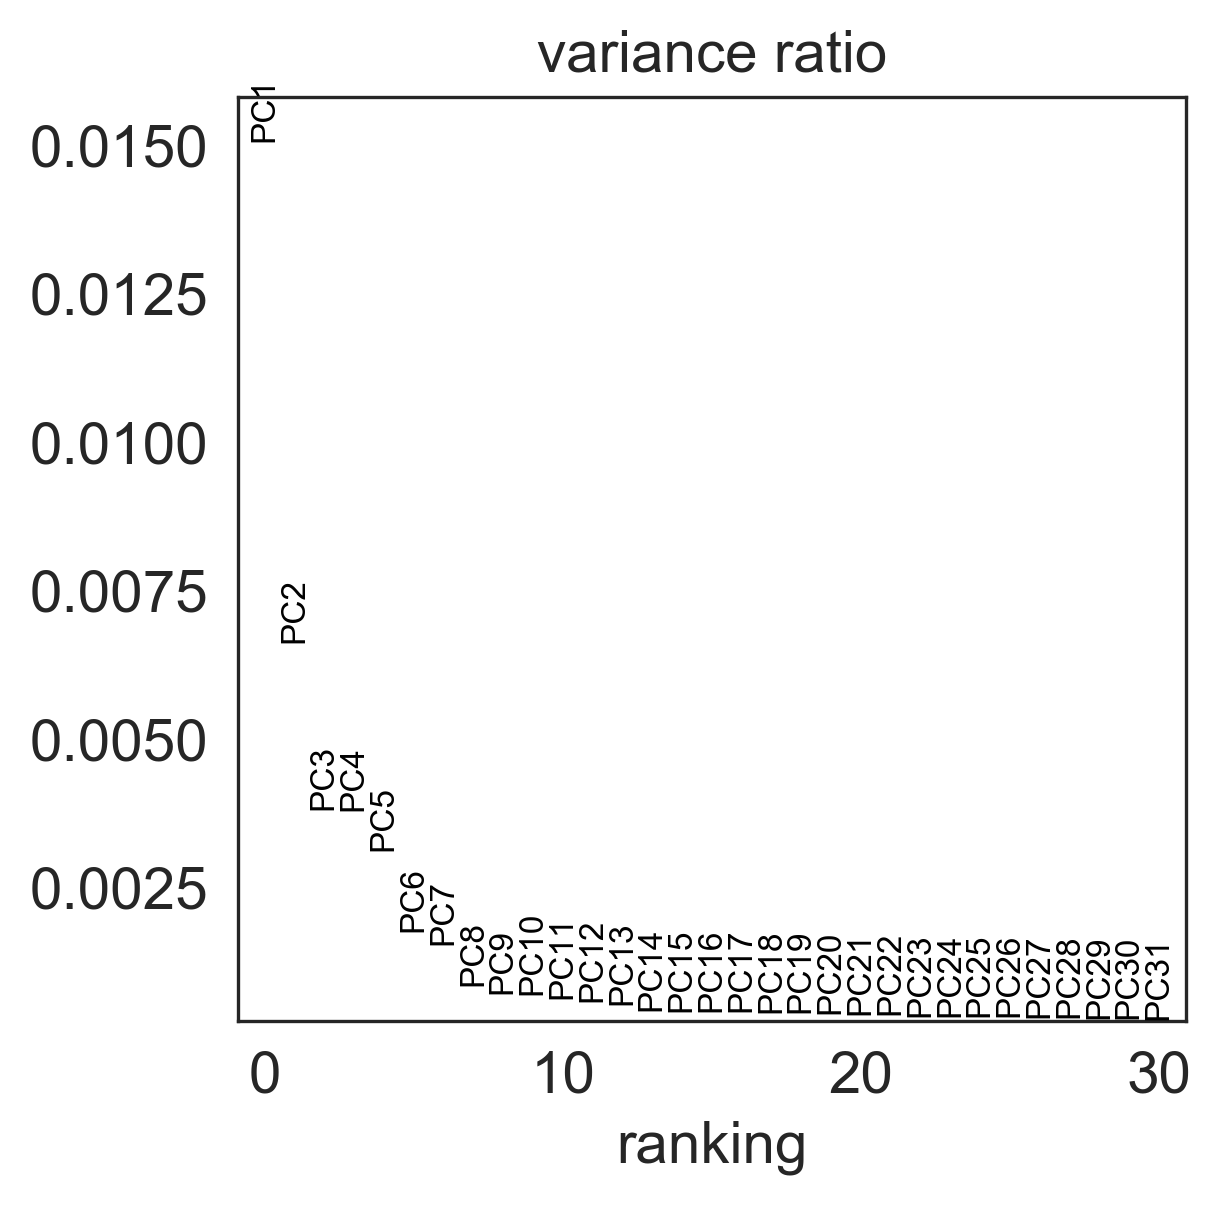

In [53]:
sc.pl.pca_variance_ratio(harmonized,show=False)

In [ ]:
sc.pp.neighbors(harmonized, n_neighbors=25, n_pcs=10, metric="correlation")
sc.tl.umap(harmonized, min_dist=0.05)

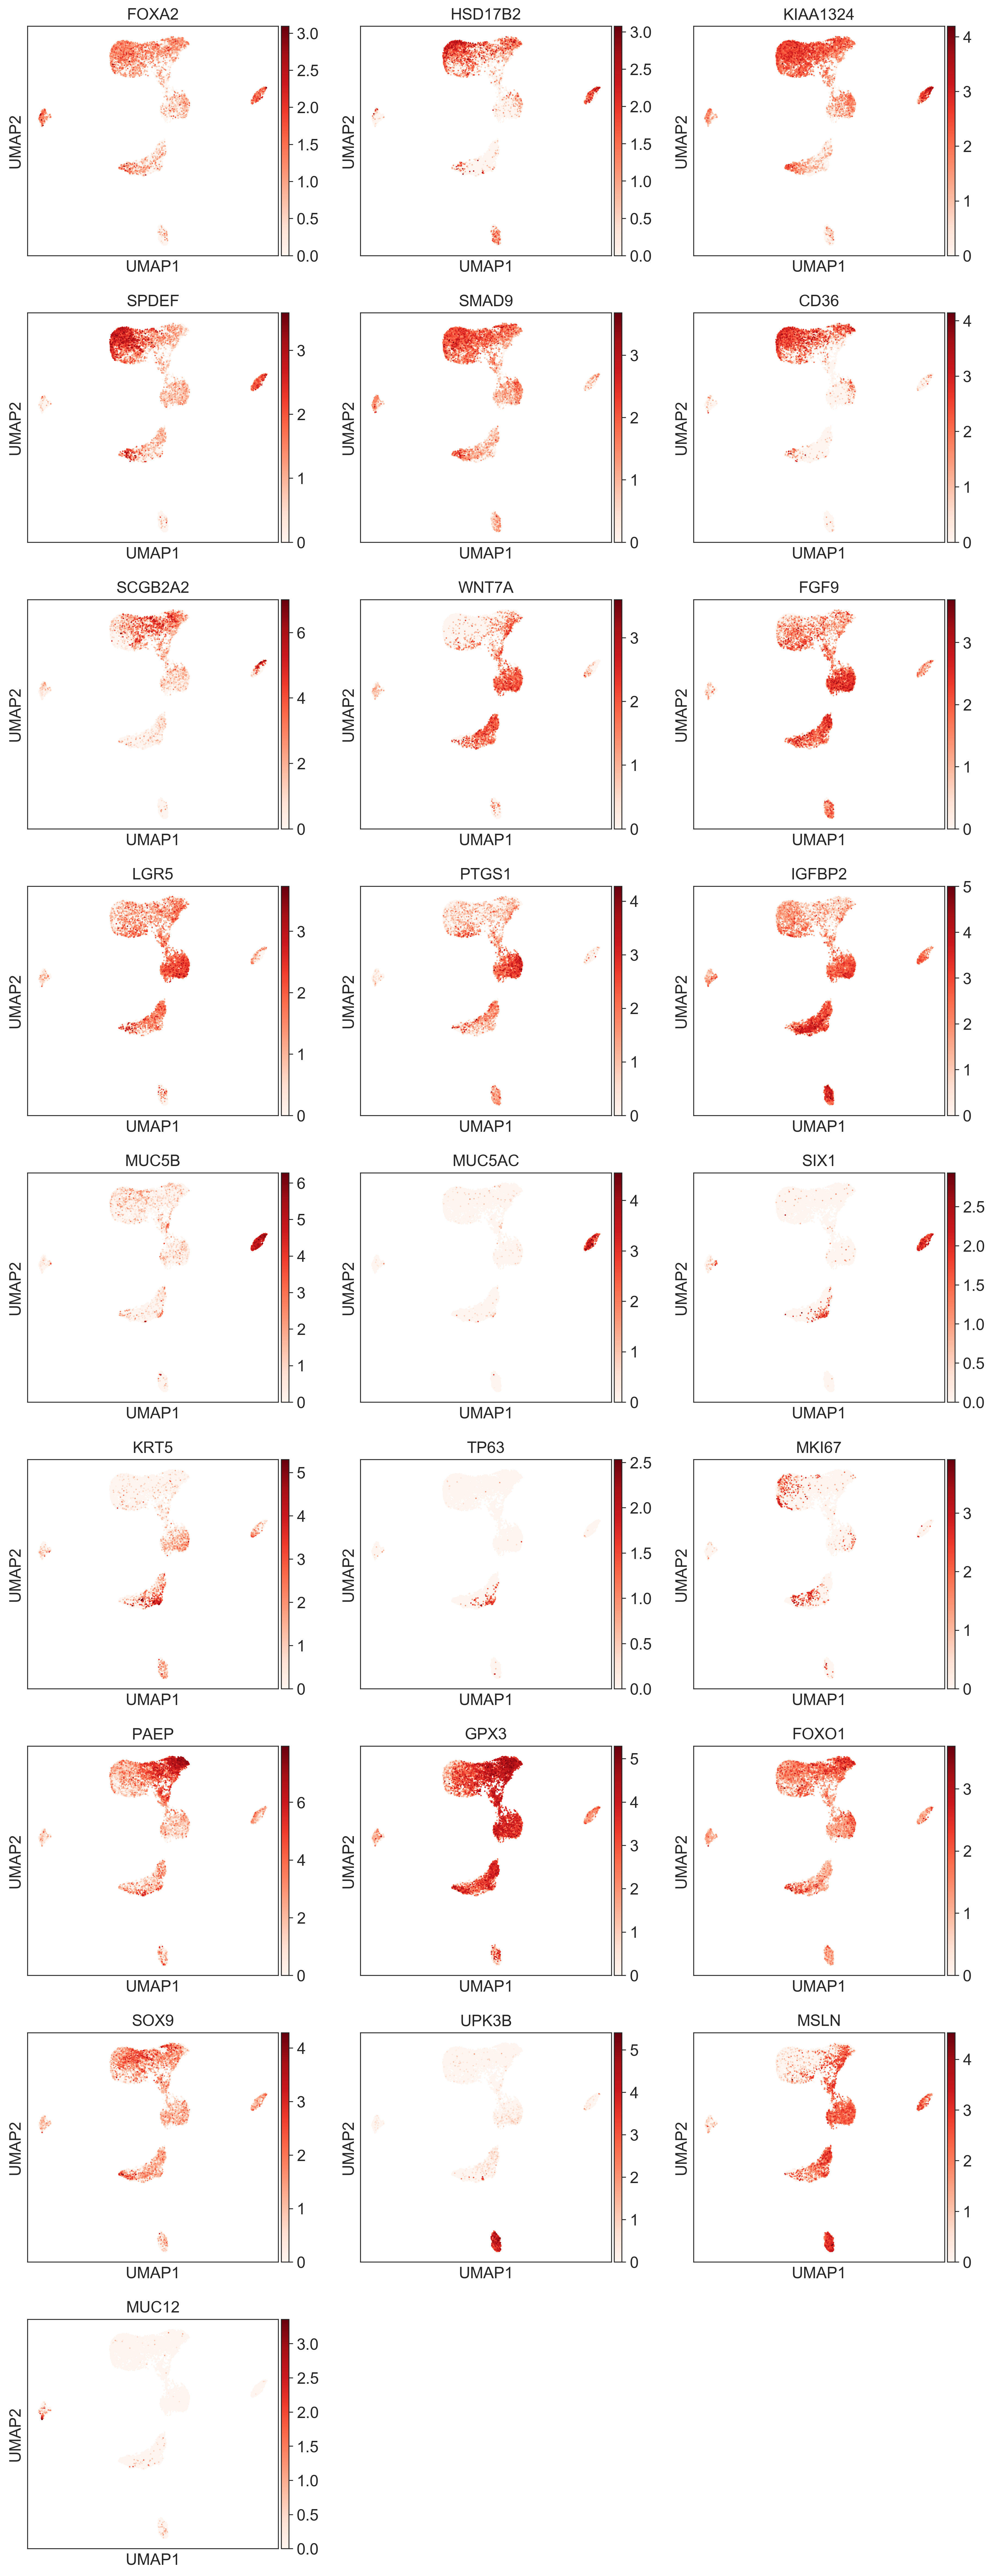

In [55]:
sc.pl.umap(harmonized, color = ["FOXA2","HSD17B2","KIAA1324","SPDEF","SMAD9","CD36",
                                "SCGB2A2","WNT7A","FGF9","LGR5","PTGS1","IGFBP2",
                                "MUC5B","MUC5AC","SIX1","KRT5","TP63","MKI67",
                                "PAEP","GPX3","FOXO1","SOX9","UPK3B","MSLN","MUC12"],
           color_map="Reds",ncols=3)

---

#### Clustering

running Leiden clustering


/opt/conda/lib/python3.7/site-packages/scanpy/tools/_leiden.py:111: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']


    finished: found 7 clusters and added
    'epi_leiden', the cluster labels (adata.obs, categorical) (0:00:10)
running Leiden clustering


/opt/conda/lib/python3.7/site-packages/scanpy/tools/_leiden.py:111: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']


    finished: found 8 clusters and added
    'epi_leiden_R1', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering


/opt/conda/lib/python3.7/site-packages/scanpy/tools/_leiden.py:111: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']


    finished: found 9 clusters and added
    'epi_leiden_R2', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering


/opt/conda/lib/python3.7/site-packages/scanpy/tools/_leiden.py:111: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adjacency = adata.uns['neighbors']['connectivities']


    finished: found 10 clusters and added
    'epi_leiden_R3', the cluster labels (adata.obs, categorical) (0:00:00)


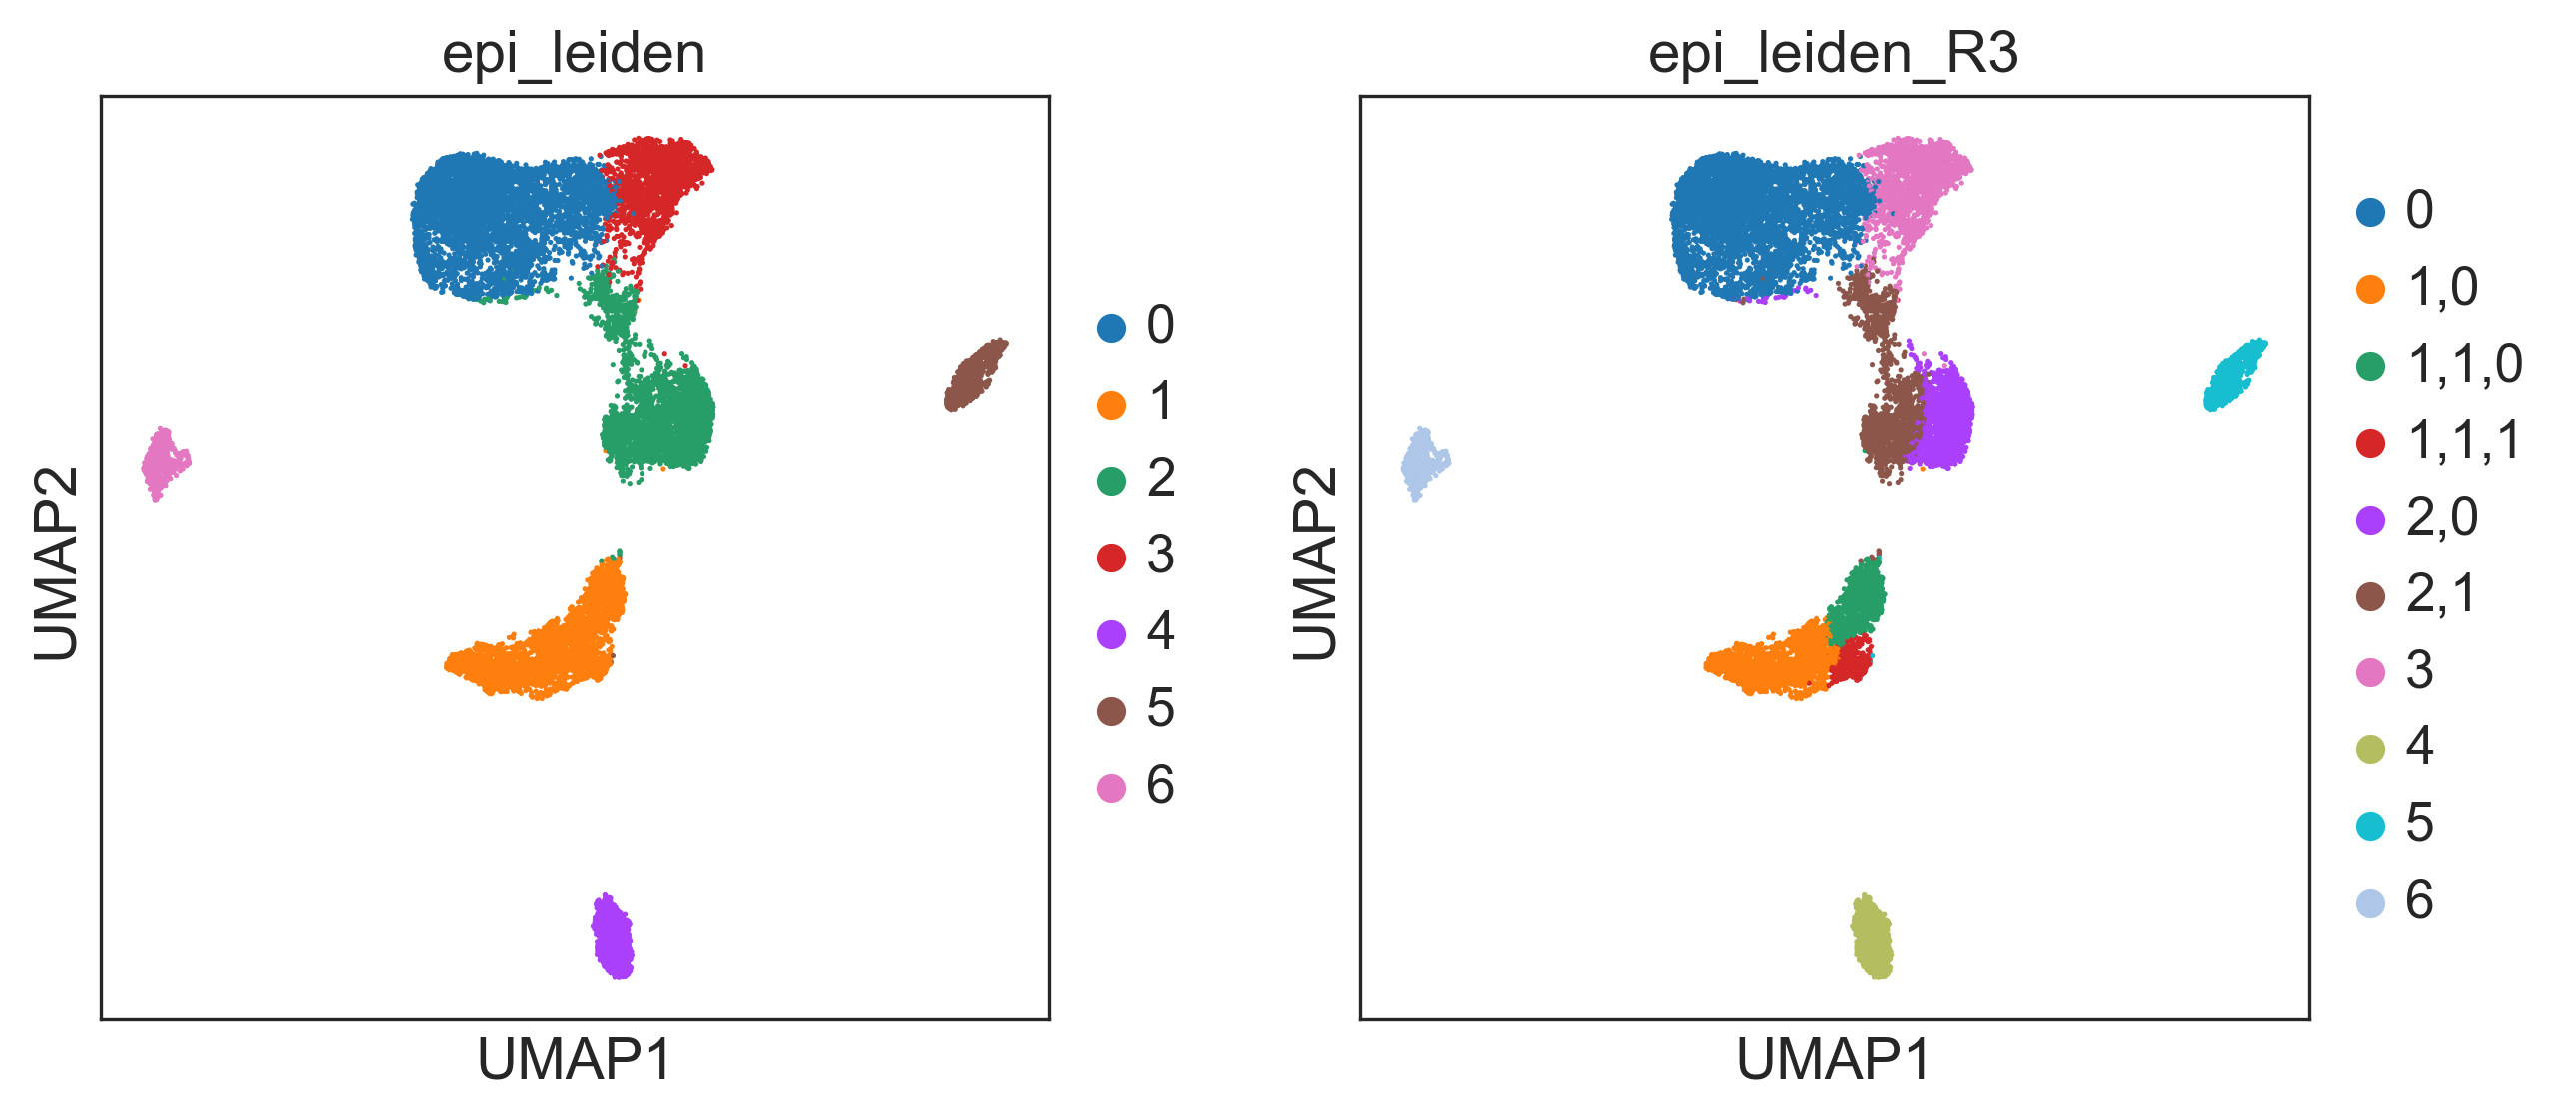

In [104]:
sc.tl.leiden(harmonized, resolution=0.2, key_added="epi_leiden")
sc.tl.leiden(harmonized, resolution=0.1, key_added="epi_leiden_R1", restrict_to=("epi_leiden", ['1']))
sc.tl.leiden(harmonized, resolution=0.2, key_added="epi_leiden_R2", restrict_to=("epi_leiden_R1", ['1,1']))
sc.tl.leiden(harmonized, resolution=0.2, key_added="epi_leiden_R3", restrict_to=("epi_leiden_R2", ['2']))
sc.pl.umap(harmonized, color=["epi_leiden","epi_leiden_R3"])

In [87]:
harmonized[harmonized.obs.epi_leiden == "4"].obs.sample_type.value_counts()

Ectopic           636
Ectopic Adj       366
Eutopic Normal    165
Ectopic Ovary     125
Eutopic             4
Name: sample_type, dtype: int64

In [105]:
save_adata(harmonized, "harmonized-Epi", subdir=sub_dir)

---

#### Doublet Identification

***Visible doublet***

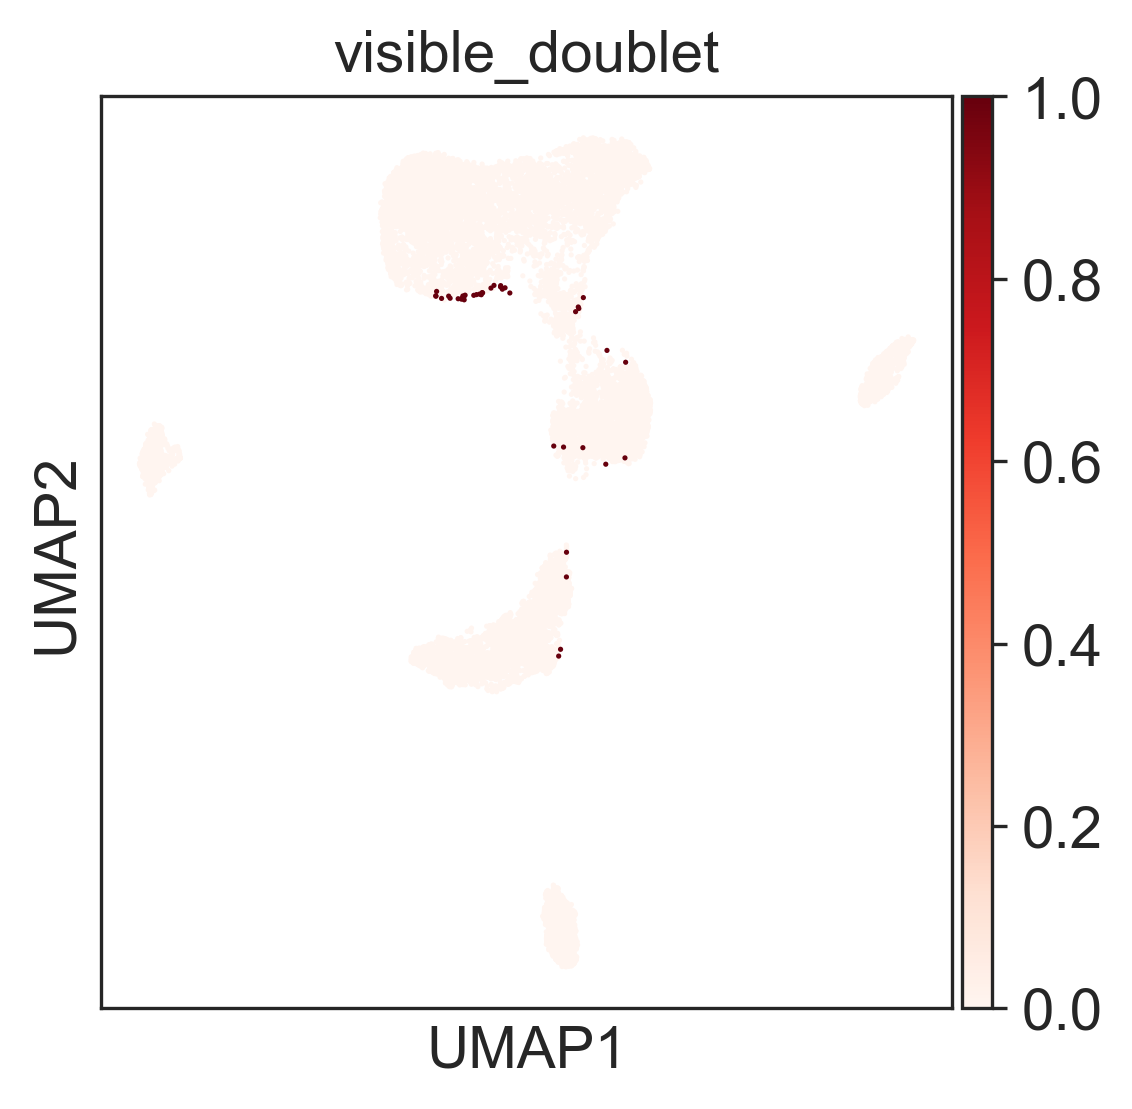

In [107]:
detect_umap_doublets(harmonized, cluster_key= "epi_leiden_R3", t=10)
sc.pl.umap(harmonized,color=["visible_doublet"], color_map="Reds")

In [108]:
clean = harmonized[~harmonized.obs.visible_doublet,:].copy()

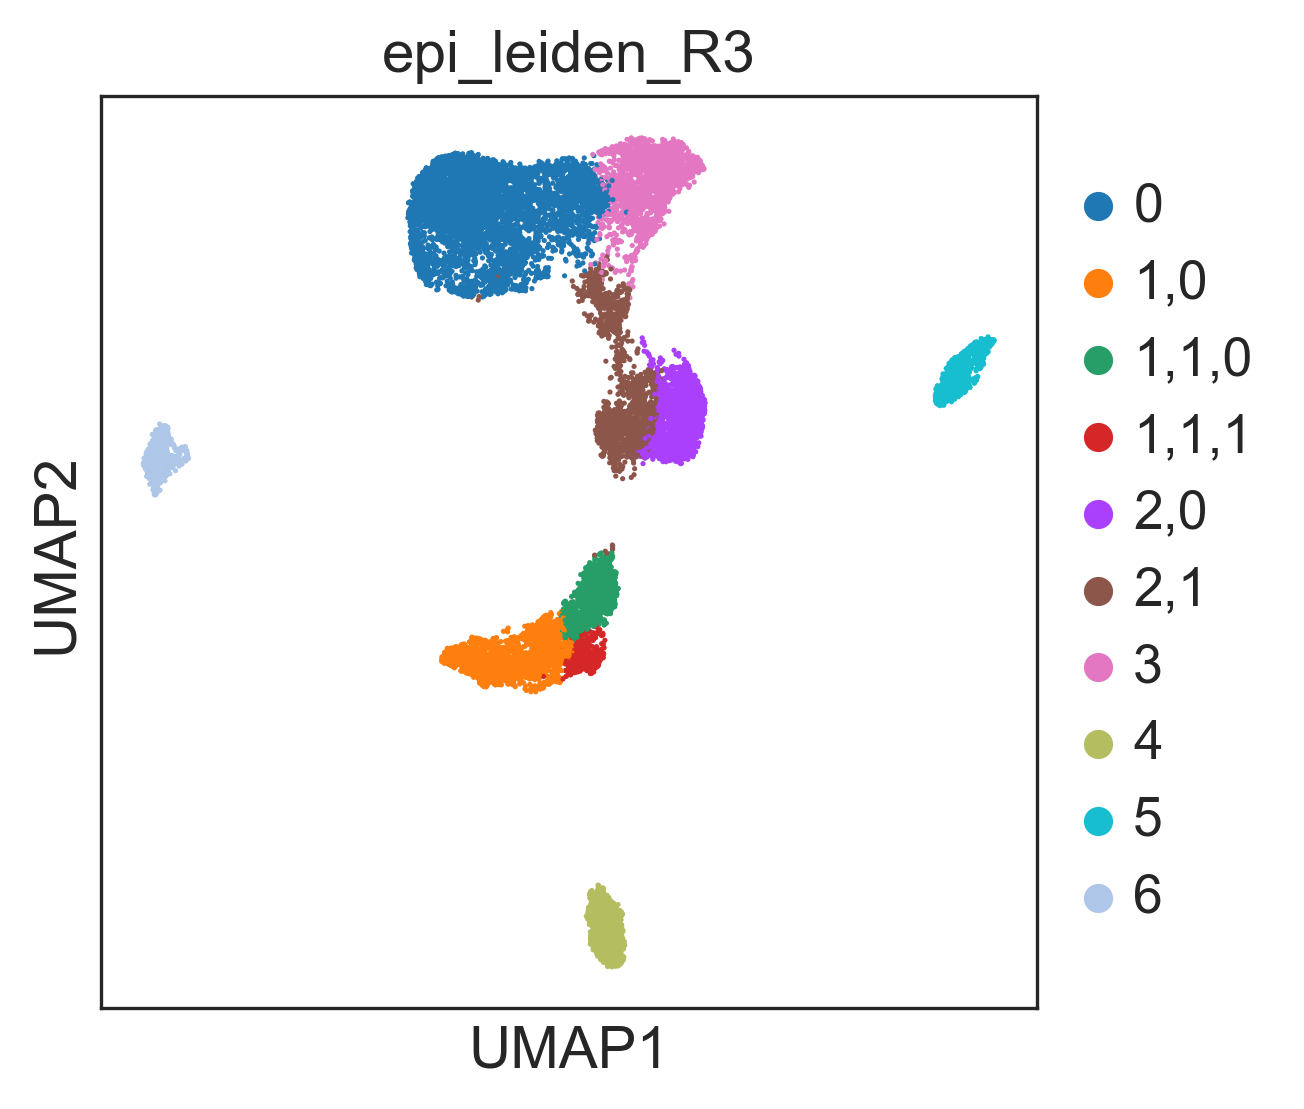

In [109]:
sc.pl.umap(clean,color=["epi_leiden_R3"])

In [111]:
reorder_clusters_hierarchical(clean,cluster_key="epi_leiden_R3",new_key="epi_cluster")

AnnData object with n_obs × n_vars = 19200 × 24231
    obs: 'sequencing_saturation', 'Patient_id', 'stage', 'scrublet_predicted_doublet', 'scrublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mitochondrial', 'log1p_total_counts_mitochondrial', 'pct_counts_mitochondrial', 'total_counts_hemoglobin', 'log1p_total_counts_hemoglobin', 'pct_counts_hemoglobin', 'library', '10x_chemistry', 'sample_name', 'sampleid', 'sample_type', 'leiden', 'leiden_R1', 'leiden_R2', 'leiden_R3', 'leiden_R4', 'leiden_R5', 'leiden_R6', 'leiden_R7', 'cluster', 'cluster_R1', 'celltype', 'celltype_main', 'epi_leiden', 'epi_leiden_R1', 'epi_leiden_R2', 'epi_leiden_R3', 'visible_doublet', 'epi_cluster'
    var: 'gene_ids', 'mitochondrial', 'hemoglobin', 'total_counts', 'n_cells_by_counts', 'ribosomal', 'cell_cycle', 'stress_response'

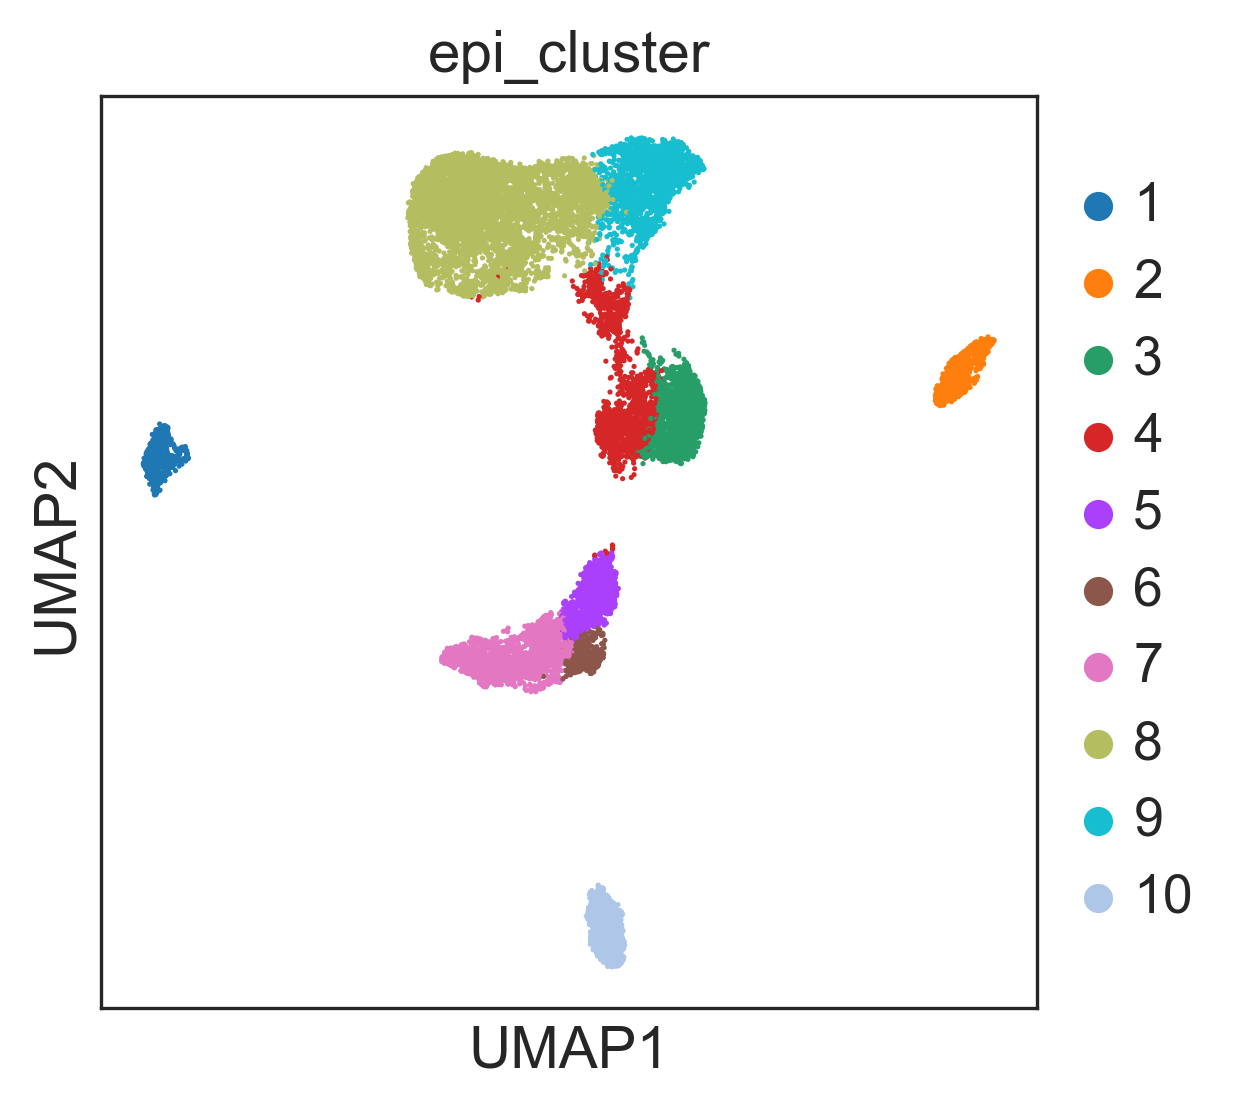

In [112]:
sc.pl.umap(clean, color=["epi_cluster"])

In [113]:
save_adata(clean,"scrubs-clean-Epi",subdir=sub_dir)

---
#### Final Subtypes Clustering
date: Nov 08th, 2021. 
<br> Final clustering based on previous analysis (cell type markers, differential gene expression, literature reviews)

In [125]:
cilliated = ["MUC12","TPPP3","PIFO","FOXJ1"] #3
progenitors = ["TP63","KRT5","SOX9","LY6E","MUC5B","TFF3","SAA1","IGFBP3","FHL2"] #12
glands = ["FOXA2",'KIAA1324','SPDEF',"SMAD9",'CD36',"HSD17B2","SCGB2A2"] #19
lum =  ["GDA","FGFR2",'WNT7A','FGF9','LGR5',"PTGS1"] #25
add = ["MSLN","UPK3B","CALB2"] #28

phase1_pro = ["PGR","ESR1","MMP7","IDO1","PSAT1"] #33
phase2_pro = ["ENPP3","GNG11","CREB3L1","IHH"] #37
early_sec = ["MT1F","MT1E","MT1X","SERPINA5"] #41
mid_sec = ["MAOA","SPP1","PAEP","CXCL14"] #45
mc = phase1_pro+phase2_pro+early_sec+mid_sec

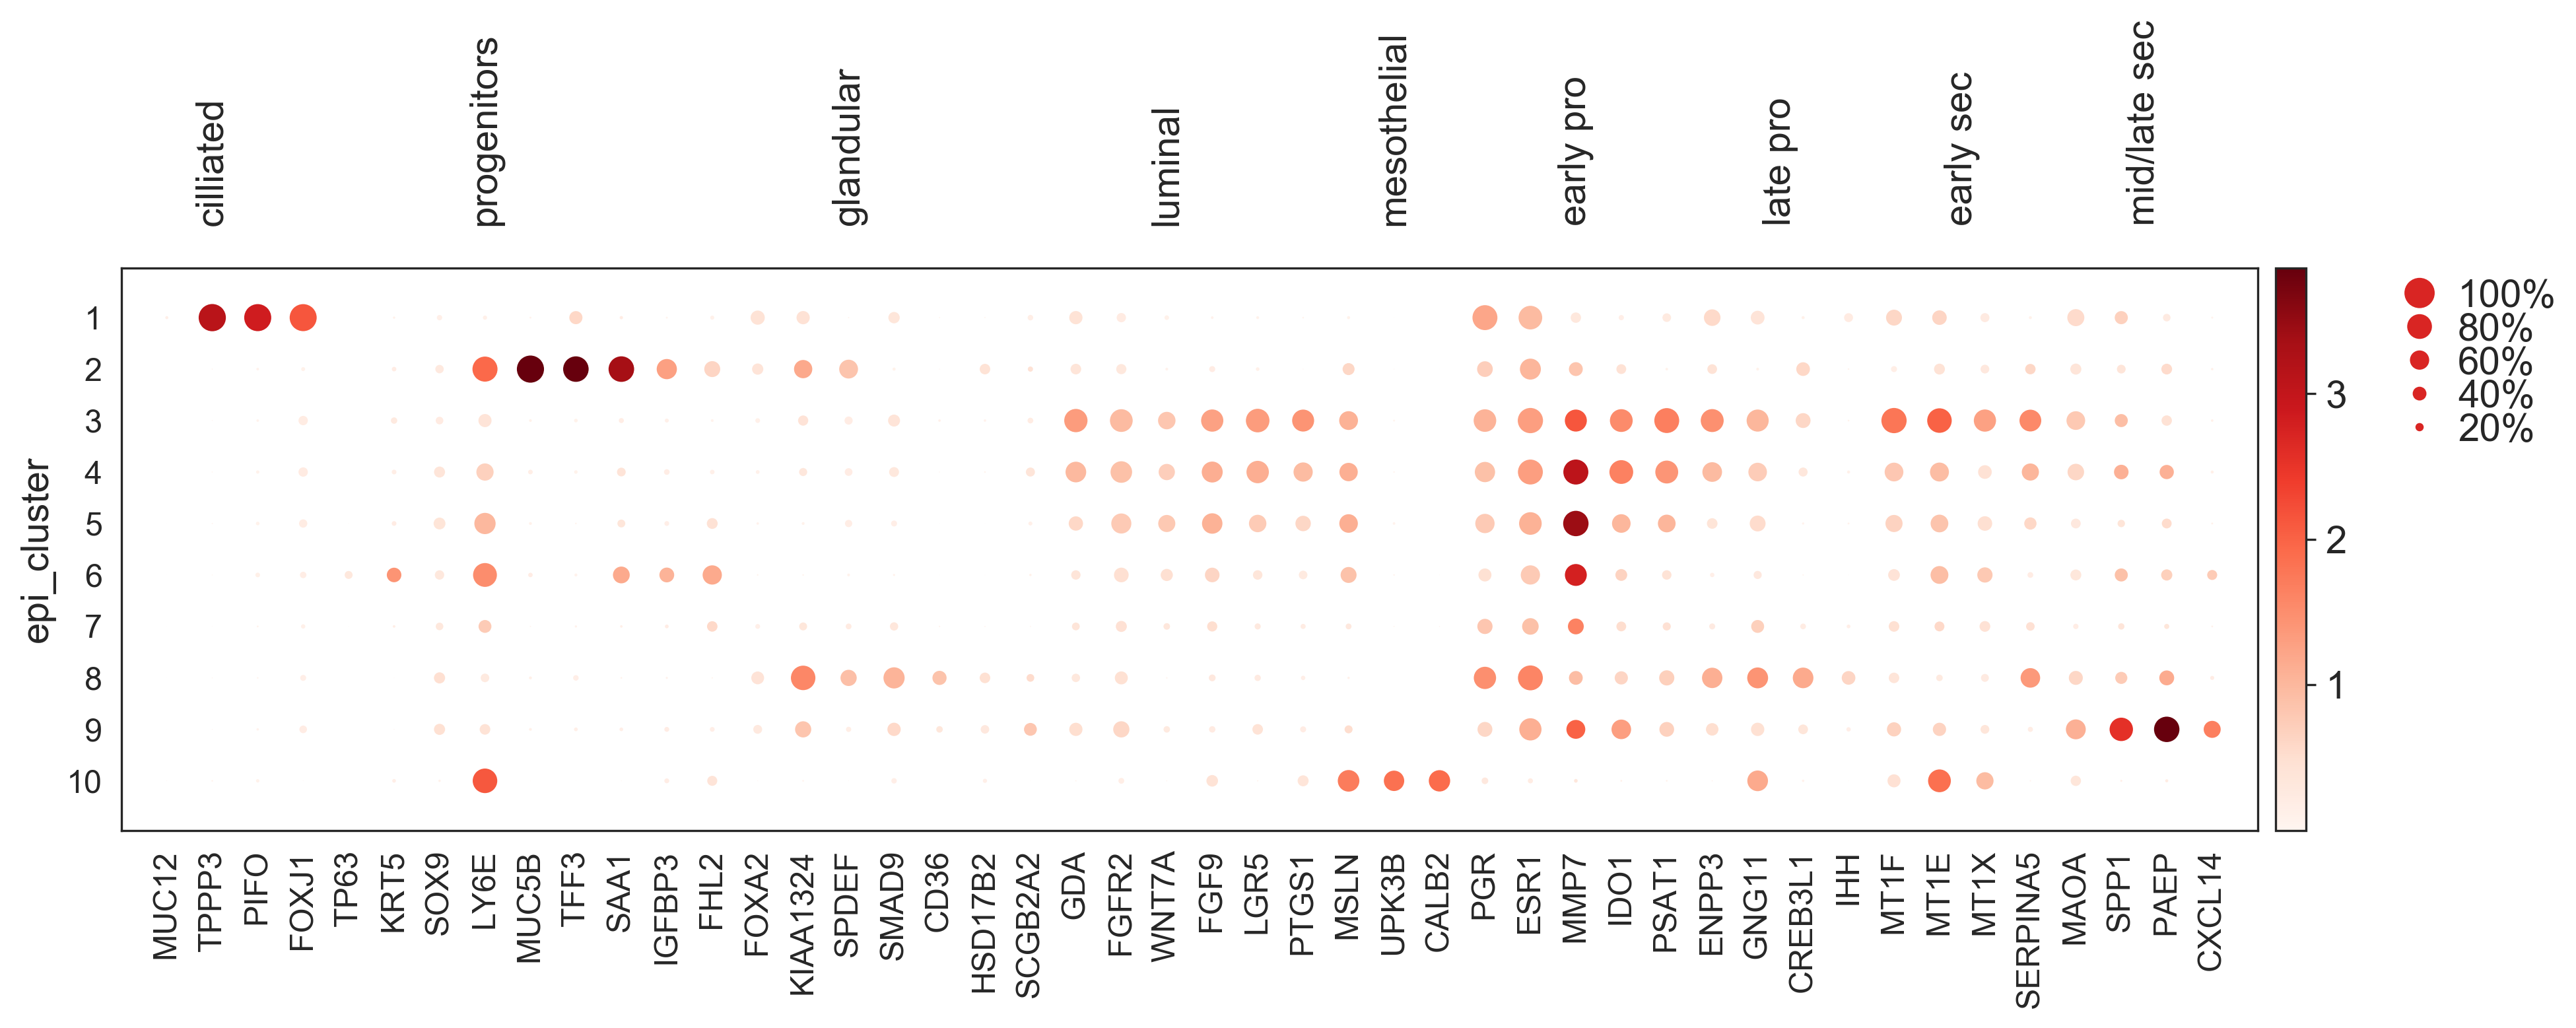

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[14.05, 0, 0.2, 0.5, 0.25])

In [127]:
sc.pl.dotplot(clean, var_names=cilliated+progenitors+glands+lum+add+mc,
              use_raw=False, 
              groupby="epi_cluster",
              var_group_labels=["cilliated","progenitors","glandular","luminal","mesothelial","early pro", 
                                "late pro","early sec", "mid/late sec"],
              var_group_positions=[(0,2),(3,11),(12,18),(19,25),(26,28),(29,33),(34,37),(38,41),(42,45)], 
              var_group_rotation=90,
              figsize=(15,4),
              )

... storing 'subtypes' as categorical


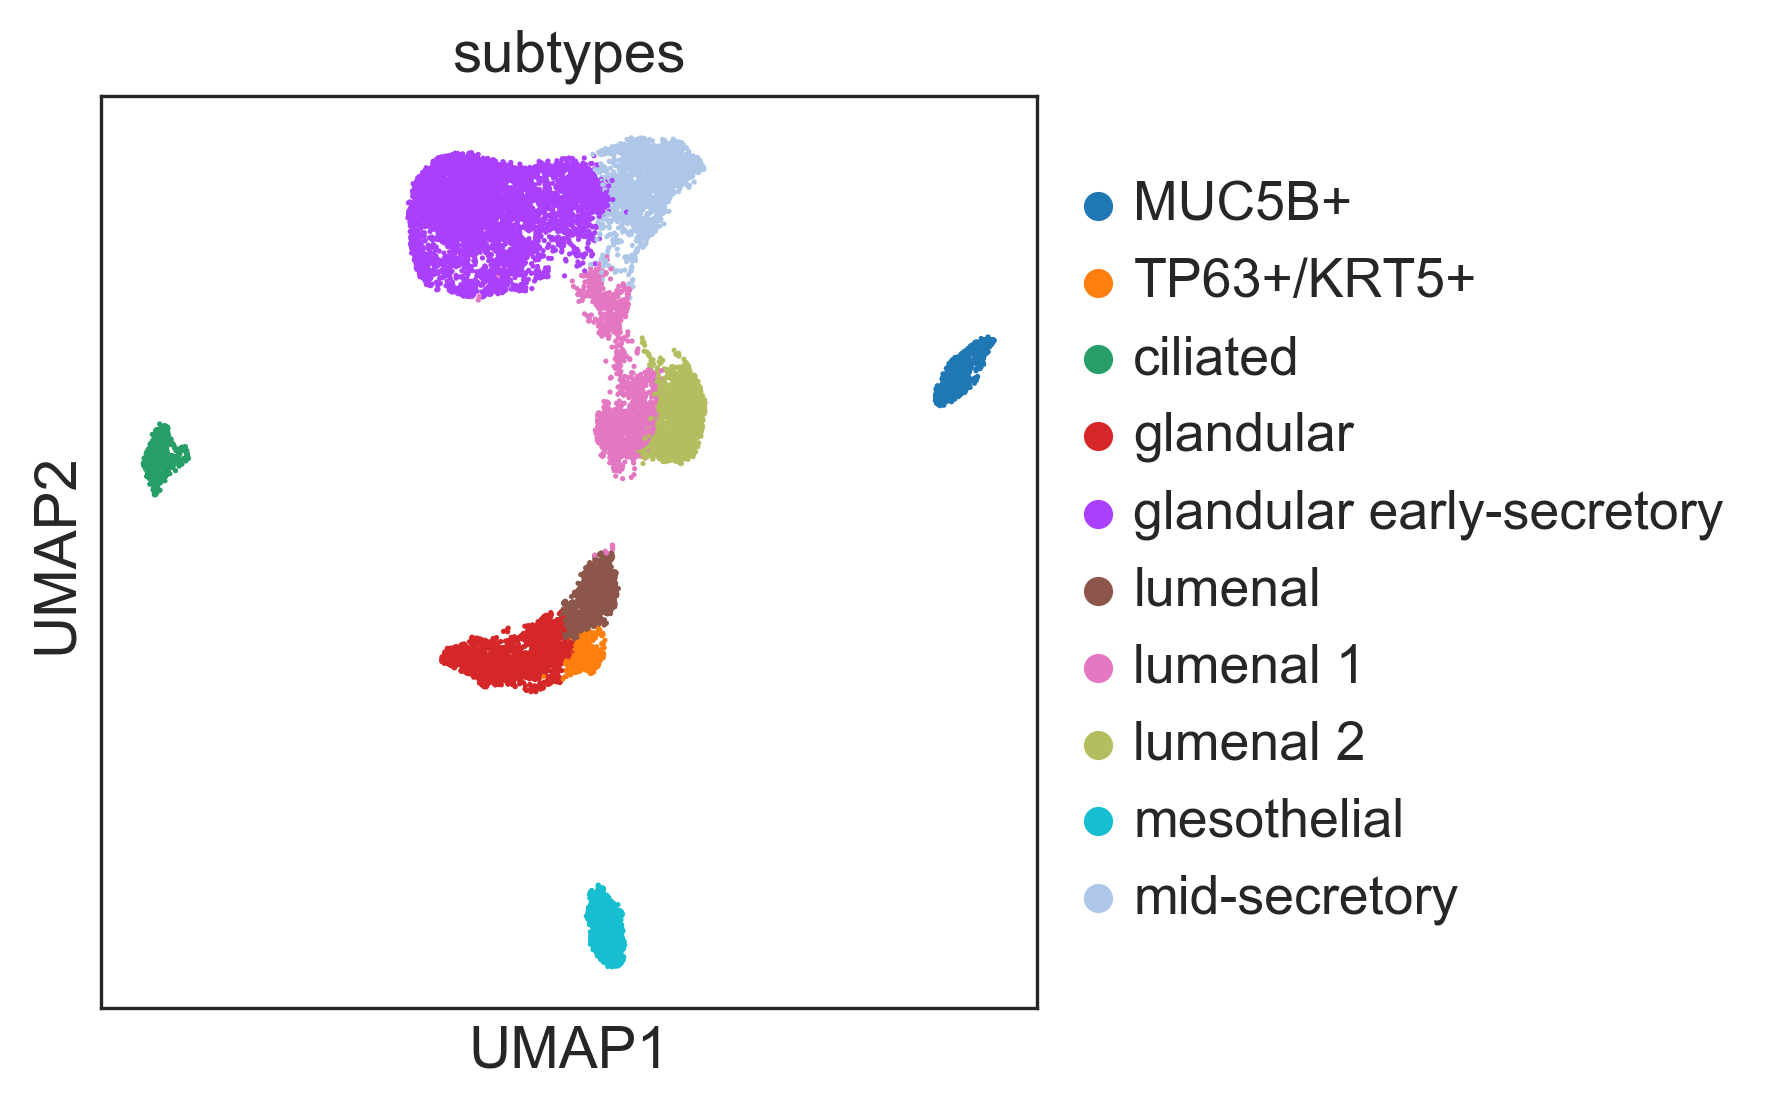

In [128]:
clean.obs["subtypes"] = clean.obs.epi_cluster.map({
    "1":"ciliated",
    "10":"mesothelial",
    "9":"mid-secretory", 
    "4":"lumenal 1",
    "3":"lumenal 2",
    "7":"glandular", 
    "8":"glandular early-secretory",
    "5":"lumenal",
    "6":"TP63+/KRT5+",
    "2":"MUC5B+",
})
sc.pl.umap(clean, color=["subtypes"])

clean.obs["subtypes"].cat.reorder_categories([
    "MUC5B+","TP63+/KRT5+","glandular","lumenal","glandular early-secretory",
    "lumenal 1","lumenal 2","mid-secretory","ciliated", "mesothelial"
],
    inplace=True)

... storing 'menstrual_phase' as categorical


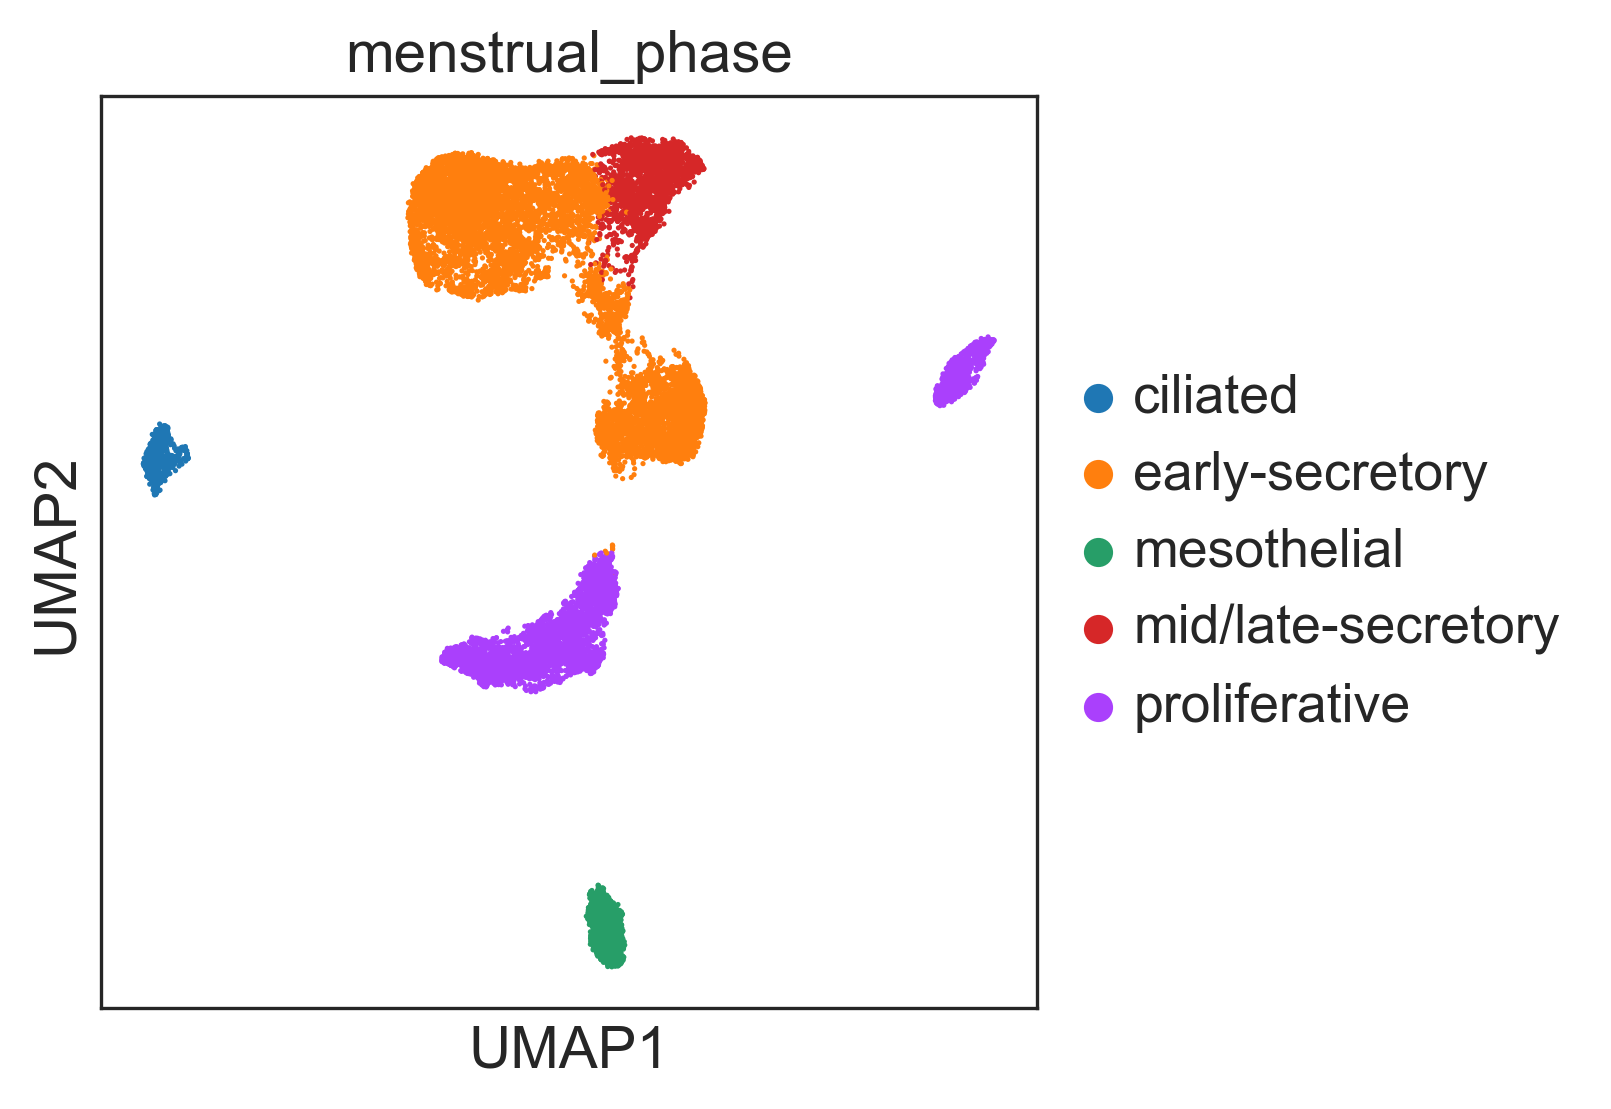

In [129]:
clean.obs["menstrual_phase"] = clean.obs.epi_cluster.map({
    "1":"ciliated",
    "2":"proliferative",
    "3":"early-secretory", 
    "4":"early-secretory", 
    "5":"proliferative", 
    "6":"proliferative", 
    "7":"proliferative",
    "8":"early-secretory",
    "9":"mid/late-secretory",
    "10":"mesothelial"
})

sc.pl.umap(clean, color=["menstrual_phase"])

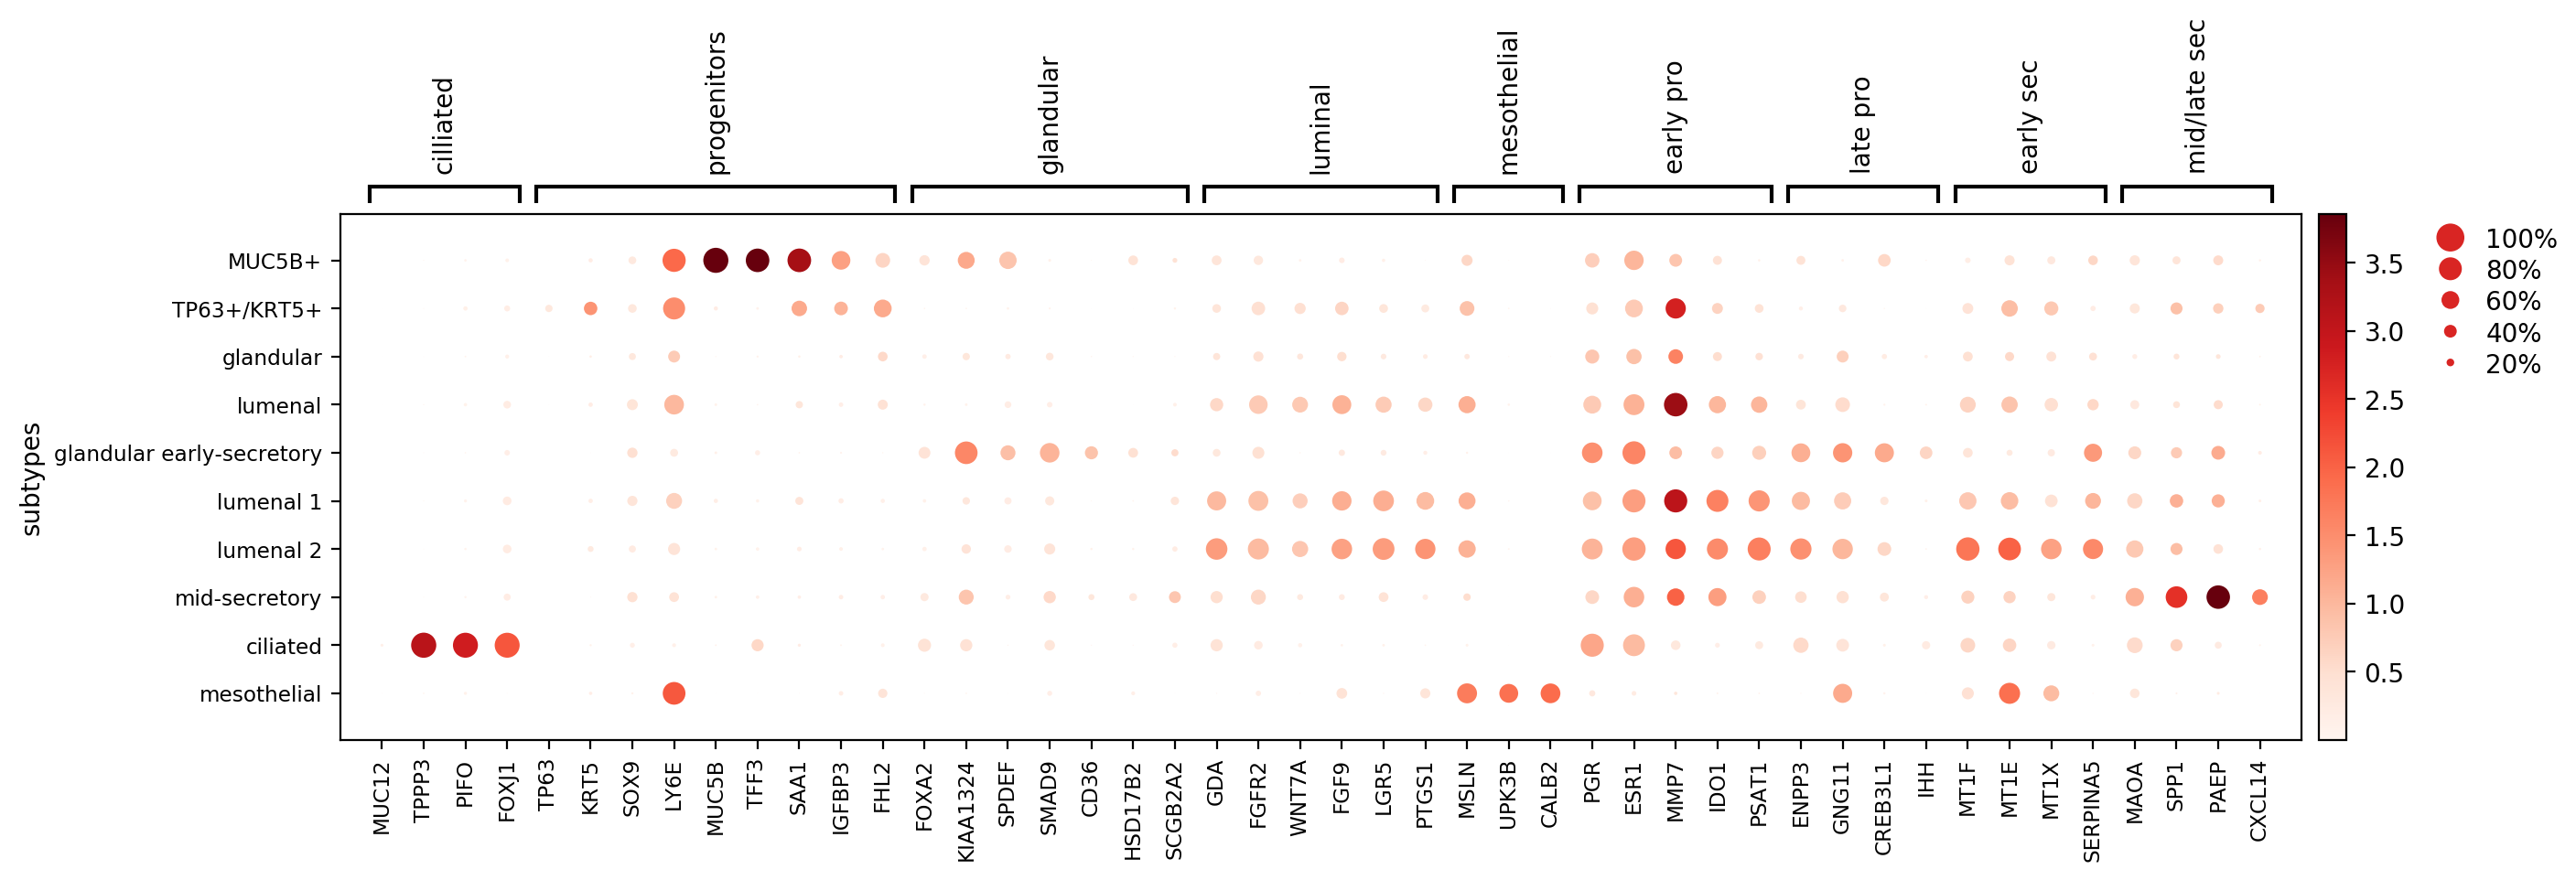

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[14.05, 0, 0.2, 0.5, 0.25])

In [134]:
matplotlib.rcdefaults()
sc.pl.dotplot(clean, var_names=cilliated+progenitors+glands+lum+add+mc,
              use_raw=False, 
              groupby="subtypes",
              var_group_labels=["cilliated","progenitors","glandular","luminal","mesothelial","early pro", 
                                "late pro","early sec", "mid/late sec"],
              var_group_positions=[(0,3),(4,12),(13,19),(20,25),(26,28),(29,33),(34,37),(38,41),(42,45)], 
              var_group_rotation=90,
              figsize=(15,4),
              )

In [130]:
save_adata(clean,"final-Epi",subdir=sub_dir)

---

In [8]:
clean = sc.read(f"{main_dir}/data/h5ad/{sample_id}/{sub_dir}/{sample_id}-final-Epi-20220119.h5ad")

***Cell_type Markers***

In [132]:
clean_copy = clean.copy()
#clean_copy.raw = sc.AnnData(clean_copy.layers["raw"], var=clean_copy.var, obs=clean_copy.obs)
clean_copy.raw = clean_copy
sc.tl.rank_genes_groups(clean_copy, groupby="subtypes",use_raw=False, method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:56)


Filtering genes using: min_in_group_fraction: 0.6 min_fold_change: 0.5, max_out_group_fraction: 0.4
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_subtypes']`
categories: MUC5B+, TP63+/KRT5+, glandular, etc.
var_group_labels: MUC5B+, TP63+/KRT5+, lumenal, etc.


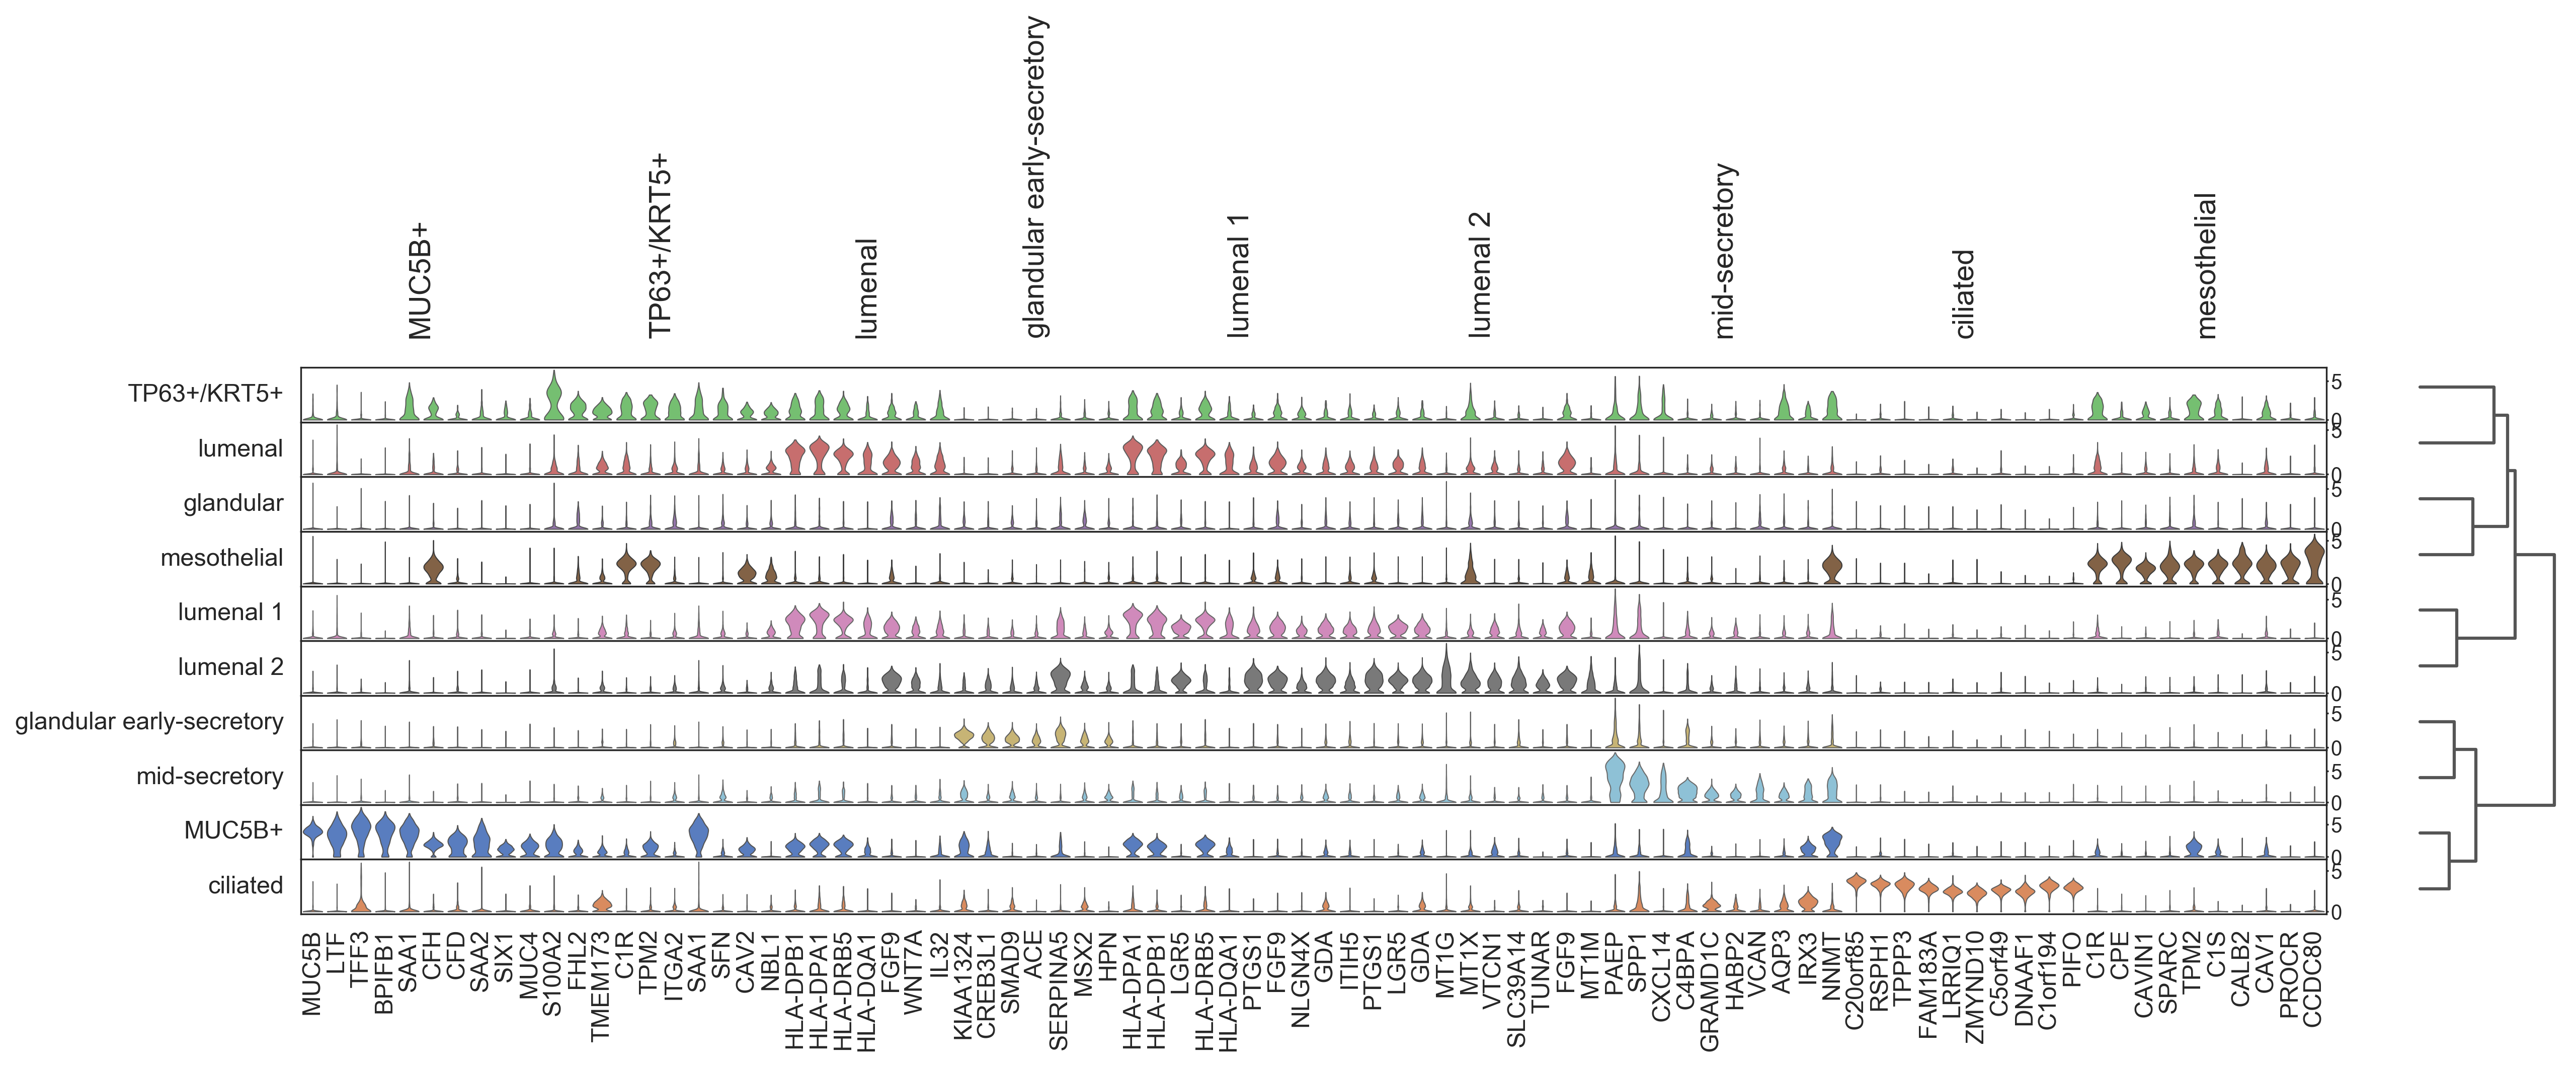

In [133]:
sc.tl.filter_rank_genes_groups(clean_copy,use_raw=False,key="rank_genes_groups", 
                               min_in_group_fraction= 0.6,min_fold_change= 0.5, max_out_group_fraction= 0.4)
sc.pl.rank_genes_groups_stacked_violin(clean_copy,key='rank_genes_groups_filtered', n_genes=10,)

#### Markers of different epithelial cell types with eutopic dataset only
Q: would epithelial in the ectopic lesion skewed marker genes for cell type annotations? eg, mesothelial population

In [136]:
#Eutopic only
eutopic = clean_copy[clean_copy.obs.sample_type.str.contains("Eutopic")]
eutopic.obs.sample_type.value_counts()
sc.tl.rank_genes_groups(eutopic, groupby="subtypes",use_raw=False, 
                        method='wilcoxon',key_added = "Eutopic_only")

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['Eutopic_only']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:38)


Filtering genes using: min_in_group_fraction: 0.6 min_fold_change: 0.5, max_out_group_fraction: 0.4
categories: MUC5B+, TP63+/KRT5+, glandular, etc.
var_group_labels: MUC5B+, TP63+/KRT5+, lumenal, etc.


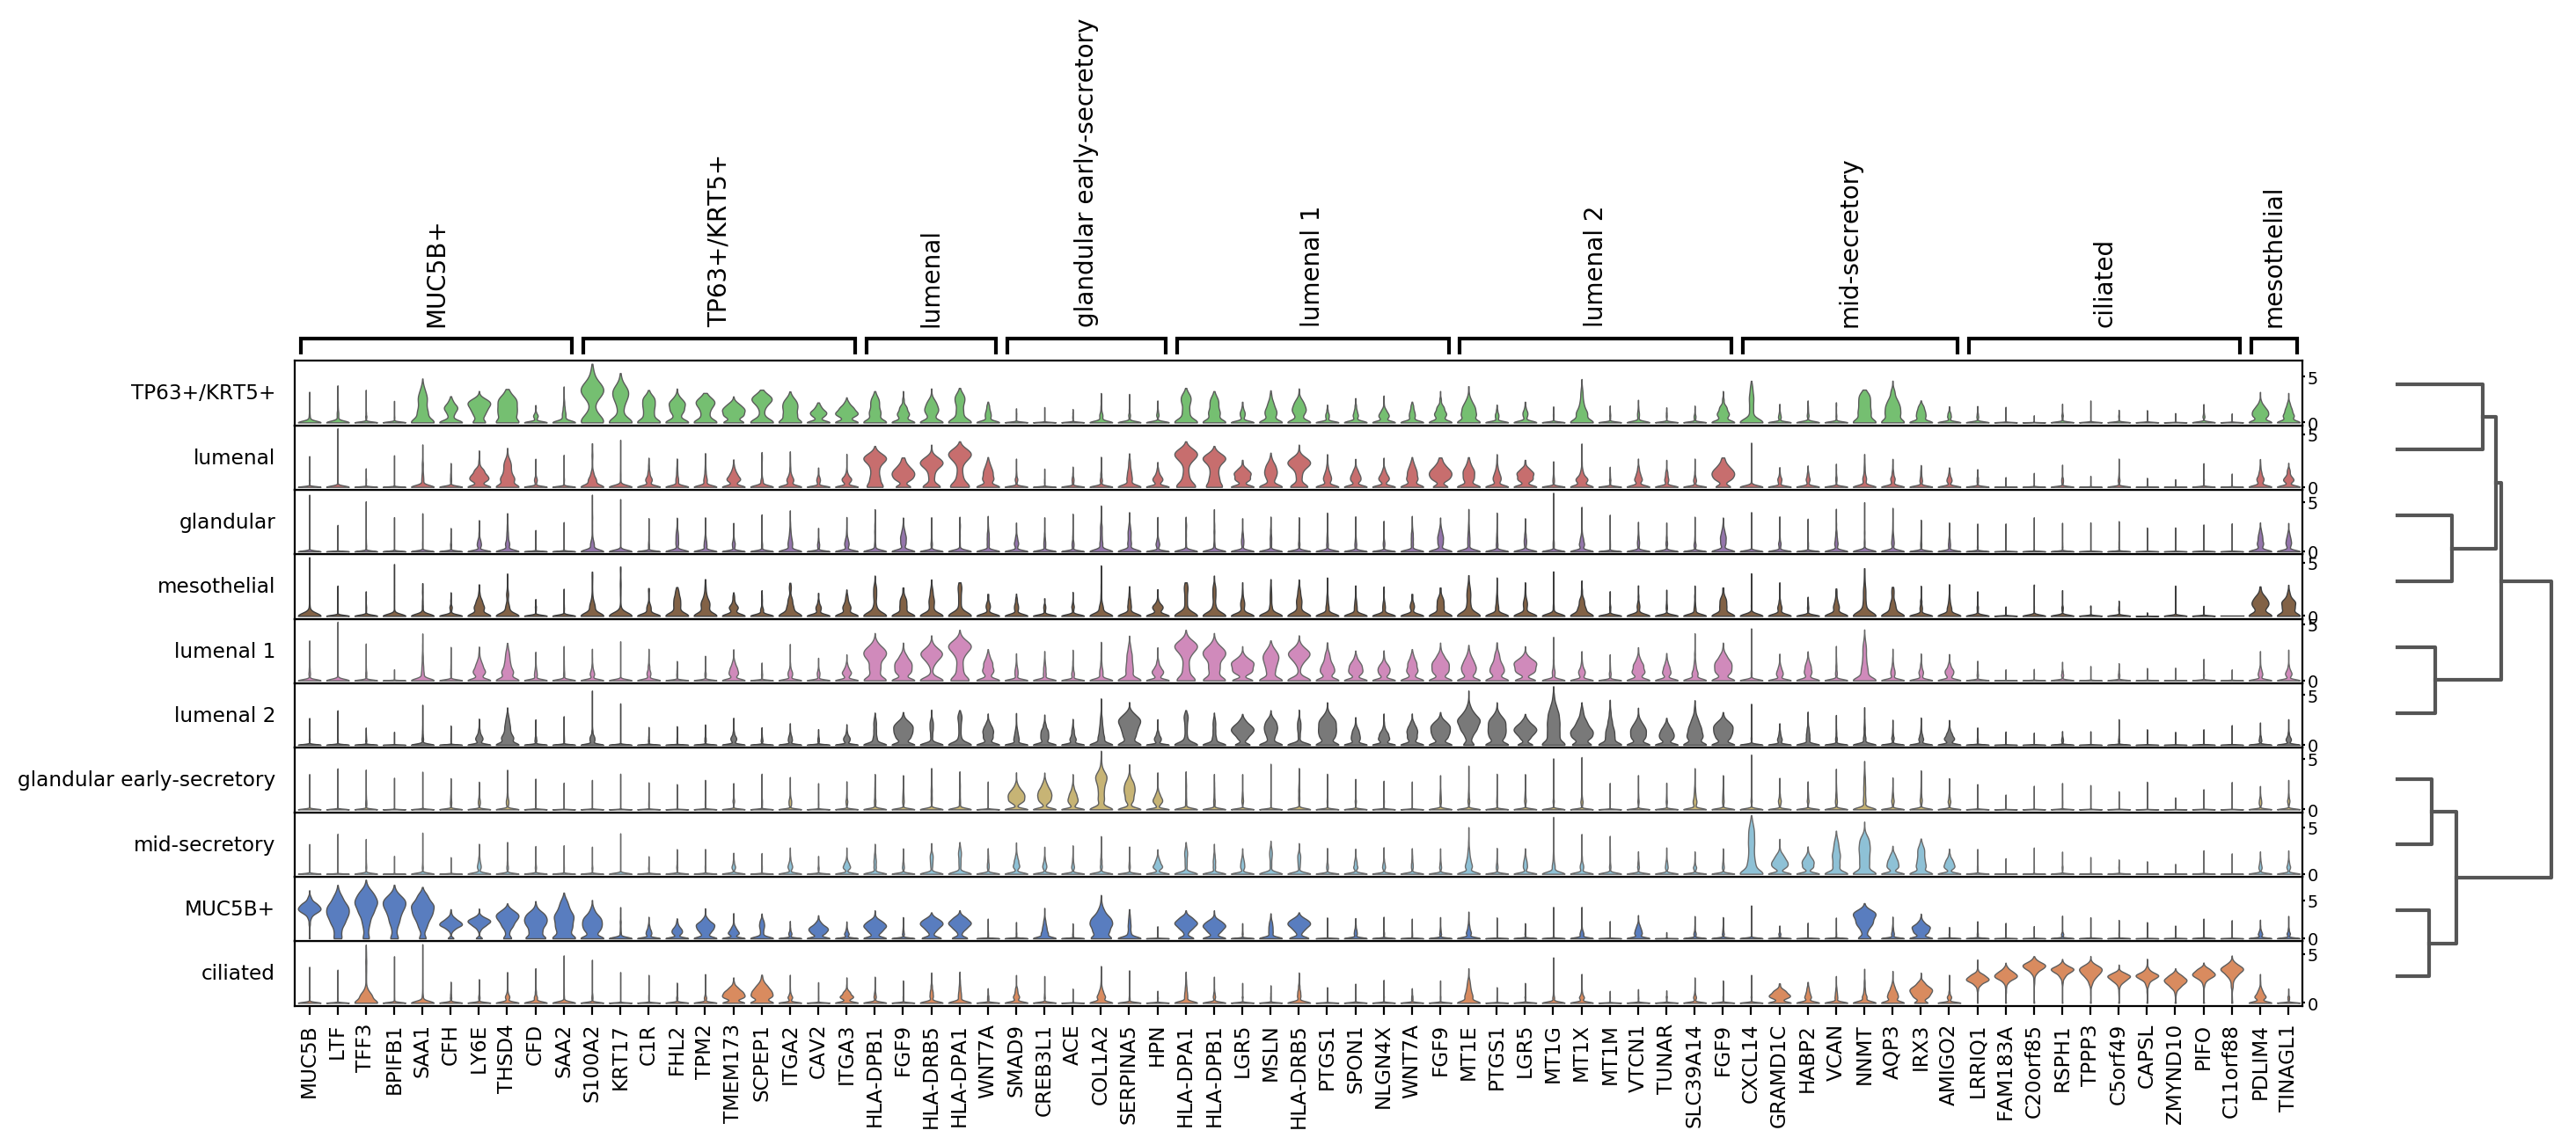

In [137]:
sc.tl.filter_rank_genes_groups(eutopic,use_raw=False,key="Eutopic_only", key_added = "rank_genes_groups_eutopic",
                               min_in_group_fraction= 0.6,min_fold_change= 0.5, max_out_group_fraction= 0.4)
sc.pl.rank_genes_groups_stacked_violin(eutopic,key='rank_genes_groups_eutopic', n_genes=10,)

In [21]:
#Ectopic only

In [138]:
ectopic = clean_copy[clean_copy.obs.sample_type.str.contains("Ectopic")]
ectopic.obs.sample_type.value_counts()
sc.tl.rank_genes_groups(ectopic, groupby="subtypes",use_raw=False, 
                        method='wilcoxon',key_added = "Ectopic_only")

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['Ectopic_only']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


Filtering genes using: min_in_group_fraction: 0.6 min_fold_change: 0.5, max_out_group_fraction: 0.4
categories: MUC5B+, TP63+/KRT5+, glandular, etc.
var_group_labels: MUC5B+, TP63+/KRT5+, lumenal, etc.


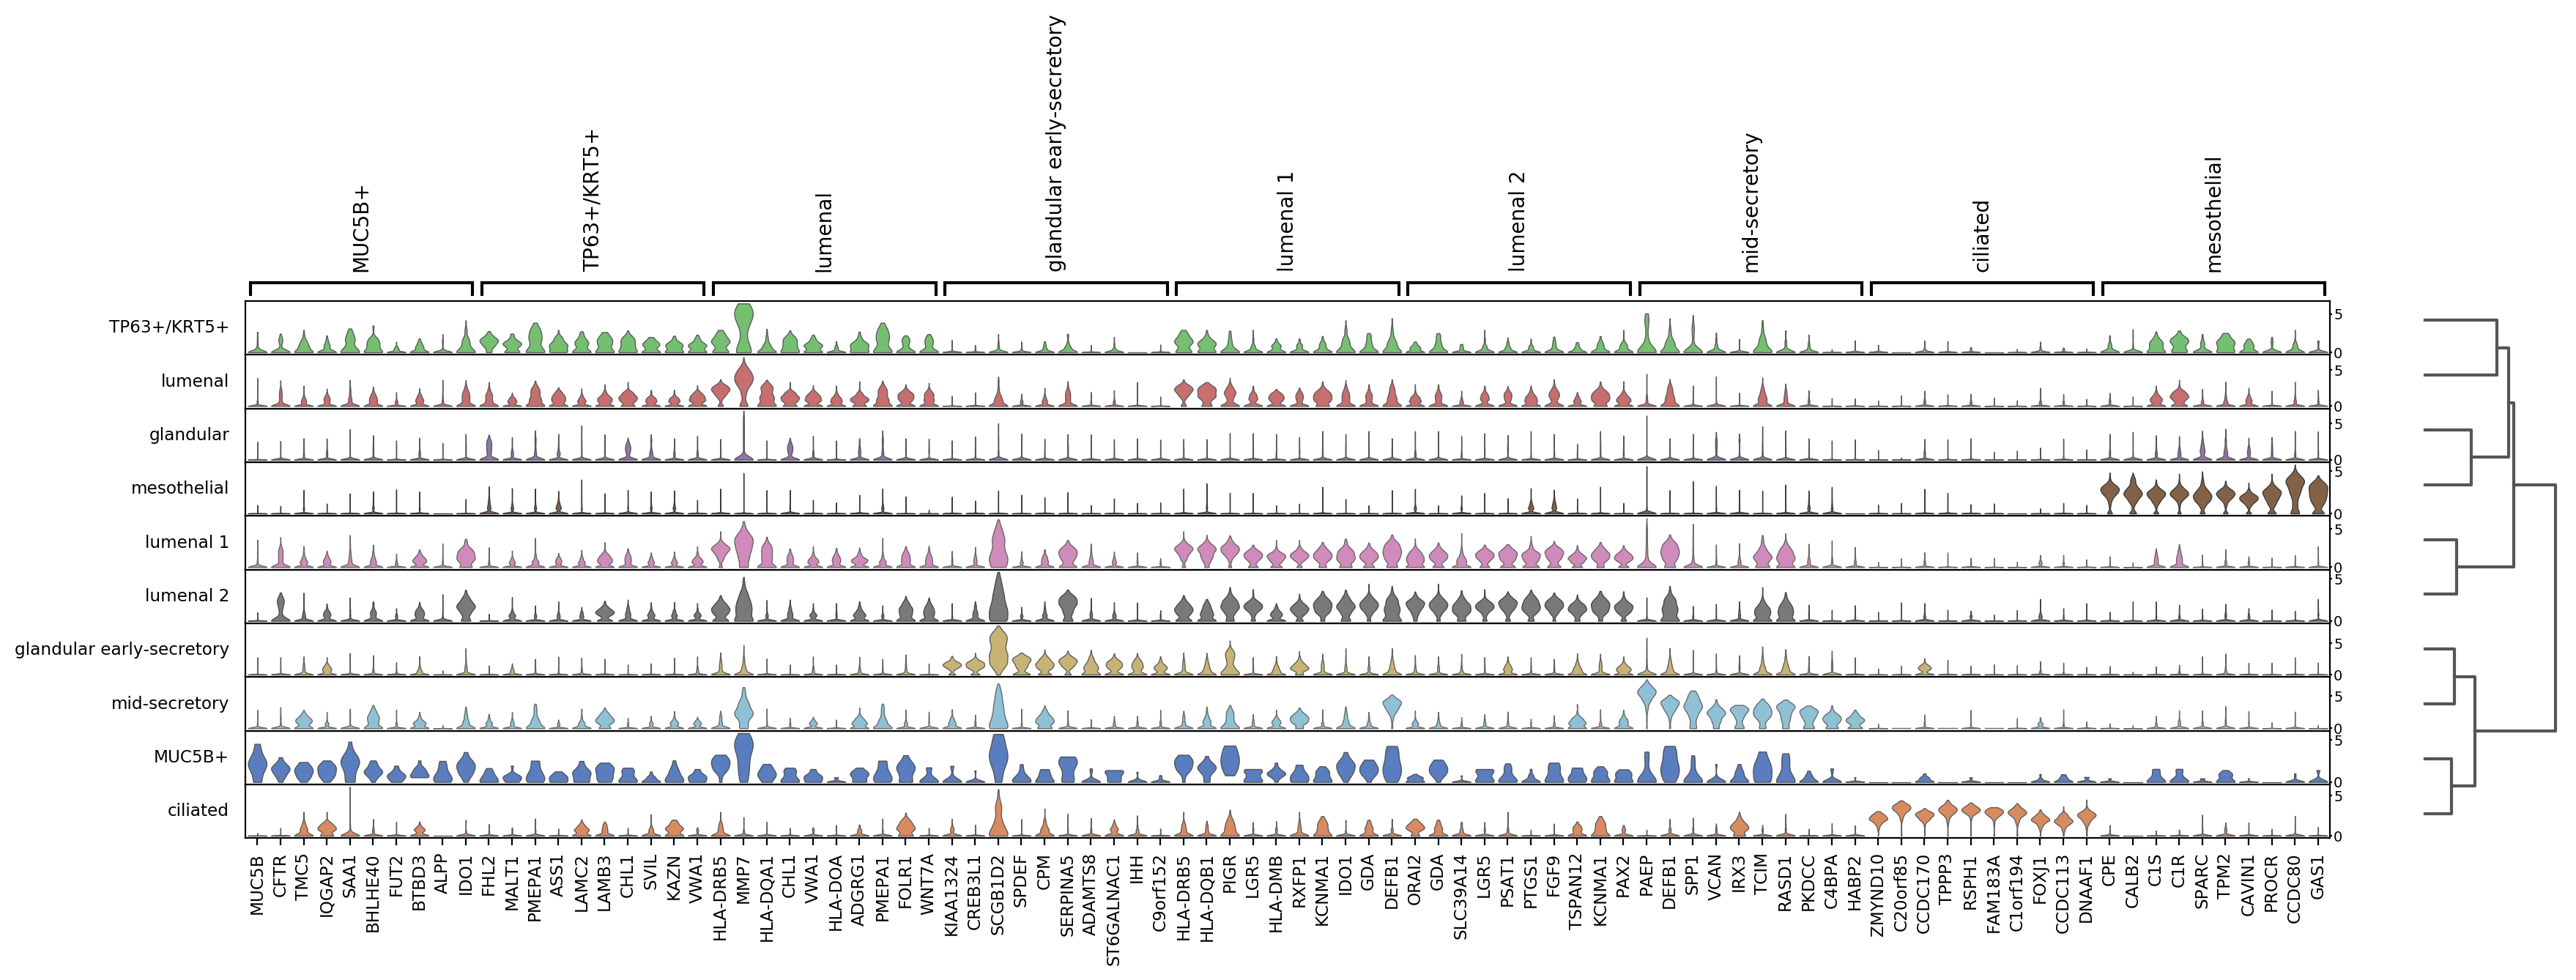

In [139]:
sc.tl.filter_rank_genes_groups(ectopic,use_raw=False,key="Ectopic_only", key_added = "rank_genes_groups_ectopic",
                               min_in_group_fraction= 0.6,min_fold_change= 0.5, max_out_group_fraction= 0.4)
sc.pl.rank_genes_groups_stacked_violin(ectopic,key='rank_genes_groups_ectopic', n_genes=10,)

A: there are few differences found by removing ectopic epithelial cells. ectopic and eutopic epithelial subtypes shared similar markers. the cells from eutopic which assigned to mesothelial clusters shared the same gene expression profile with TP63+/KRT5+, and to some extend, glandular (cycling) subpopulation. This "mesothelial-like" population did not expressed mesothelial specific markers *CALB2, UPK3B*, *PROCR* suggesting that these cells are TP63+/KRT5+ cells that shares similarity with true mesothelial cells.

---